# Linear Regression

email: saideeptalari@gmail.com

## Muti Variable

Till now we have seen regression with single feature:

$$h_{\theta}(x) = \theta_0+\theta_1(x)$$

So, if we have mulitple features as follows:

$$h_{\theta}(x) = \theta_0+\theta_1(x_1)+\theta_2(x_2)+\theta_3(x_3)+................+\theta_n(x_n)$$

We can write the following equation as:

$$h_{\theta}(x) = \theta_0(x_0)+\theta_1(x_1)+\theta_2(x_2)+\theta_3(x_3)+................+\theta_n(x_n)$$

where $x_0$ = 1

Surprisingly, solving multi variable equations is much more easy than solving the equation of single feature

We can write the above equation as follows:

$$h_{\theta}(x) = \theta^T X$$

where $\theta = \left[\begin{array}{r}
    \theta_0\\
    \theta_1\\
    .\\
    .\\
    .\\
    \theta_n
  \end{array}\right]$ and $X = \left[\begin{array}{r}
    x_0\\
    x_1\\
    .\\
    .\\
    .\\
    x_n
  \end{array}\right]$
  
  Therefore 
  $\theta^T X = \left[\begin{array}{rrrr}
    \theta_0 & \theta_1 & \theta_2 & ..........& \theta_n
  \end{array}\right]
  \left[\begin{array}{r}
    x_0\\
    x_1\\
    .\\
    .\\
    .\\
    x_n
  \end{array}\right]
   = h_\theta(x)$

So now we have:
$$Y = \theta^T X$$
$$\theta^T = X^{-1}Y$$
$$\theta^T = [(X^TX)^{-1}X^T]Y$$

Therefore we can obtain the coefficients.

Lets see an example.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
X,Y = make_regression(n_samples=250,n_features=4,effective_rank=4,noise=0.7,random_state=5)

We need to add ones for $x_0$

In [3]:
X = np.hstack((np.ones((X.shape[0],1)),X))

In [4]:
X_inv = np.linalg.inv(np.dot(X.T,X))
X_t = np.dot(X_inv,X.T)
output = np.dot(X_t,Y)
intercept,coefs = output[0],output[1:]
print coefs
print intercept

[ 72.82796466  78.76931585  71.1117219   69.97773281]
0.0555813868953


In [5]:
#Using sklearn
X,Y = make_regression(n_samples=250,n_features=4,effective_rank=4,noise=0.7,random_state=5)
model = LinearRegression()
model.fit(X,Y)
print model.coef_
print model.intercept_

[ 72.82796466  78.76931585  71.1117219   69.97773281]
0.0555813868953


In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=4)

In [7]:
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.99282197404706729

## Gradient Descent

Like above the gradient descent can be evaluated much more easily than with single feature.

Repeat until convergence {

$$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$$
$$=> \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}-y^{(i)}))x_j^{(i)}$$

} (simultaneously update $\theta_j$ for j=0,1,....,n)

In [8]:
class GradientDescent(object):
    
    def __init__(self,alpha=0.1,n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter
        self.cost = []
        self.coefs = None
        
    def fit(self,data,target):
        self.X = np.hstack((np.ones((data.shape[0],1)),data))
        self.Y = target
        m,n = self.X.shape
        self.n_features = n
        self.n_entries = m
        
    def run(self):
        theta = np.ones(self.n_features)
        xTrans = self.X.T
        for i in range(0, self.n_iter):
            hwx = np.dot(self.X, theta)
            loss = hwx - self.Y
            m = self.n_entries
            cost = np.sum(loss ** 2) / (2 * m)
            self.cost.append(cost)
            gradient = np.dot(xTrans, loss) / m
            theta = theta - self.alpha * gradient
        self.coefs=theta
        return theta[0],theta[1:]
    
    def plot(self):
        plt.xlabel('No of Iterations')
        plt.ylabel('Cost function')
        return plt.plot(np.arange(1,self.n_iter+1),self.cost)
    
    def predict(self,data):
        data = np.hstack((np.ones((data.shape[0],1)),data))
        return np.dot(data,self.coefs)
    
    def score(self,data,target):
        predicted = self.predict(data)
        true = target
        return 1-(np.sum((true-predicted)**2)/np.sum((true-true.mean())**2))
        

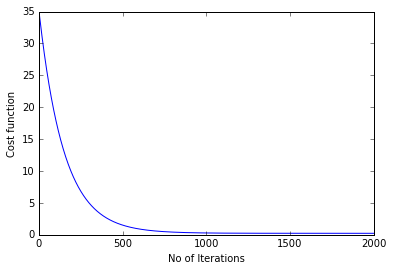

In [9]:
gd = GradientDescent(alpha=1,n_iter=2000)
gd.fit(X,Y)
intercept,coefs = gd.run()
gd.plot()

In [10]:
#r-squared score for gradient descent
gd.score(X_test,Y_test)

0.99331847058560907

In [11]:
#r-squared score for ordinary least squares
model.score(X_test,Y_test)

0.99282197404706729

In [12]:
print "Gradient descent is {}% more accurate than general method.".format((gd.score(X_test,Y_test)-model.score(X_test,Y_test))*100)

Gradient descent is 0.0496496538542% more accurate than general method.


From above results we can conclude that gradient descent is more accurate than Ordinay least squares method and hence even better results can be obtained by fine tuning $\alpha$ and Number of Iterations.

## Feature Scaling

By feature scaling we can reduce no of iterations and also all the results are standardized.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X_scaler = StandardScaler().fit(X)

In [ ]:
Y_scaler = StandardScaler().fit(Y)

In [16]:
X = X_scaler.transform(X)

In [ ]:
Y = Y_scaler.transform(Y)

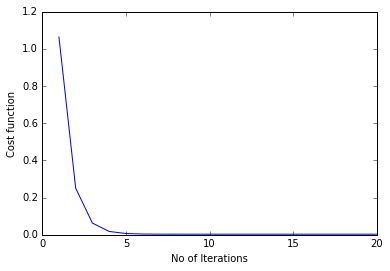

In [18]:
gd = GradientDescent(alpha=0.5,n_iter=20)
gd.fit(X,Y)
intercept,coefs = gd.run()
gd.plot()

So using feature scaling we can actually decrease no of iterations required for convergence.

## Polynomial Regression

For specific reasons we might need a model to fit data more accurately, then we can use Polynomial Regression.

$$h_\theta(x) = \theta_0+\theta_1(x)+\theta_2(x^2)+....+\theta_n(x^n)$$

Otherwise

$$h_\theta(x) = \theta_0+\theta_1(x)+\theta_2(\sqrt[2]{x})+....+\theta_n(\sqrt[n]{x})$$

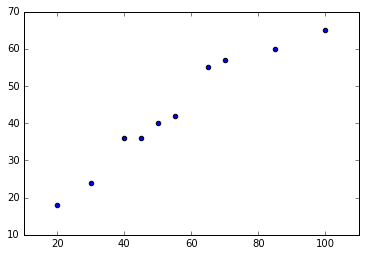

In [19]:
X = np.c_[np.array([20,30,40,45,50,55,65,70,85,100])]
Y = np.c_[np.array([18,24,36,36,40,42,55,57,60,65])]
plt.scatter(X,Y)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
model = LinearRegression()
poly_featurizer = PolynomialFeatures(degree=4)

In [22]:
X_train = poly_featurizer.fit_transform(X)

In [23]:
xx = np.linspace(0,150,300)

xx_poly = poly_featurizer.transform(np.c_[xx])

In [24]:
model.fit(X_train,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

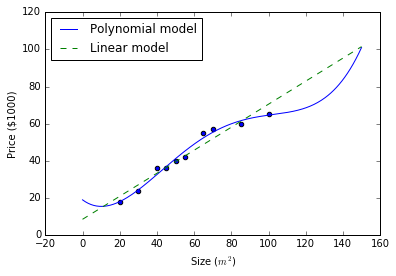

In [25]:
lin_model = LinearRegression()
lin_model.fit(X,Y)
plt.plot(xx,model.predict(xx_poly),label='Polynomial model')
plt.plot(xx,lin_model.predict(np.c_[xx]),'--',label='Linear model')
plt.scatter(X,Y)
plt.ylim(0,120)
plt.xlabel('Size ($m^2$)')
plt.ylabel('Price ($1000)')
plt.legend(loc='upperleft')

In [26]:
model.score(X_train,Y)

0.98342835696526809

In [27]:
lin_model.score(X,Y)

0.94463087975319759

The polynomial model is 4% accurate than the linear model.

Though it is accurate for available data but it may fail as it is **overfitted** so to reduce overfitting we use **Regularization**